# **Hello, this is our submission for the project: **

# **Yoga Class Analysis using Human pose estimation**

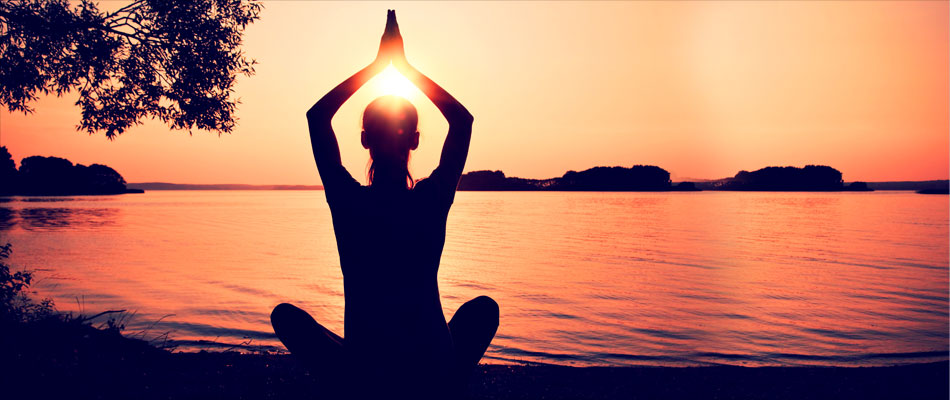



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# **Collecting dataset**

In [ ]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Pre-processing of the images**

In [ ]:
# Set the paths for the dataset
#dataset_path = '/content/drive/MyDrive/yoga_dataset/'
dataset_path = '/content/drive/MyDrive/YOGA/content/cleaned/DATASET'
train_dir = dataset_path + '/TRAIN/'
test_dir = dataset_path + '/TEST/'

In [ ]:
# Parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 50
num_classes = 5

In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1084 images belonging to 5 classes.
Found 466 images belonging to 5 classes.


This code defines data generators for training and testing an image classification model using Keras. The generators read images from directories, resize them, batch them, and categorize them for use in the model training process.


In [ ]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# **Model training**

This code defines a Convolutional Neural Network (CNN) model for image classification using Keras. The model consists of several convolutional layers followed by pooling layers, a flatten layer, and fully connected layers with dropout regularization, and ends with a softmax activation function for multiclass classification.

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size,
    callbacks = [early_stopping, checkpoint])

Epoch 1/50
 2/33 [>.............................] - ETA: 3:46 - loss: 10.5427 - accuracy: 0.1719

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


28/33 [========================>.....] - ETA: 47s - loss: 2.5546 - accuracy: 0.2713

KeyboardInterrupt: ignored

# **Model evaluation**

In [ ]:
# Evaluate the model
scores = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])


In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#**PREDICTION**

In [ ]:

def predict_yoga_pose(image_path):
    # Load the image
    image = load_img(image_path, target_size=img_size)

    # Convert the image to an array
    image_array = img_to_array(image)
    image_array = image_array / 255.0  # Rescale the image

    # Expand the dimensions of the image array
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions
    predictions = model.predict(image_array)

    # Decode the predictions to get the class label
    predicted_class = np.argmax(predictions, axis=-1)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]

    return predicted_label

This code defines a function that takes an image path as input and returns the predicted class label for the image using a pre-trained model. The function loads the image, converts it to a NumPy array, rescales it, and then uses the pre-trained model to make predictions. The predictions are then decoded to obtain the predicted class label, which is returned by the function.

In [ ]:
while True:
    image_path = input("Enter the image path (type 'exit' to quit): ")
    if image_path.lower() == 'exit':
        break
    predicted_label = predict_yoga_pose(image_path)
    print(f"Predicted class for {image_path}: {predicted_label}")